In [525]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import LabelEncoder

In [526]:
traindf = pd.read_csv(r"D:\Python\Codes\Big Mart Sales Prediction Problem\Data\train_v9rqX0R.csv")
testdf = pd.read_csv(r"D:\Python\Codes\Big Mart Sales Prediction Problem\Data\test_AbJTz2l.csv")

In [527]:
traindf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [528]:
traindf.shape

(8523, 12)

In [529]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [530]:
traindf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [531]:
traindf.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

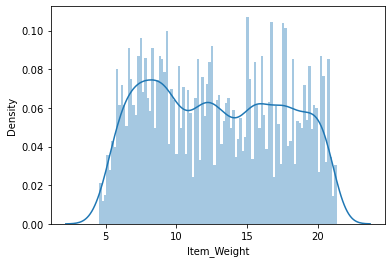

In [532]:
sns.distplot(traindf['Item_Weight'], bins=100)

In [533]:
traindf[traindf['Item_Weight'] == np.NaN]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [534]:
traindf['Item_Weight'].fillna(0, inplace=True)

In [535]:
traindf[traindf['Item_Weight']==0].index

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [536]:
ind = traindf[traindf['Item_Weight']==0].index

In [537]:
ind

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [538]:
traindf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [539]:
for i in ind:
    it = traindf.iloc[i, 0]
    traindf.iloc[i,1]=np.mean(traindf[traindf['Item_Identifier']==it]['Item_Weight'])
    

In [540]:
traindf[traindf['Item_Weight']==0].index

Int64Index([927, 1922, 4187, 5022], dtype='int64')

In [541]:
ind=traindf[traindf['Item_Weight']==0].index

In [542]:
traindf['Item_Weight'].replace(0,np.mean(traindf['Item_Weight']),inplace=True)

In [543]:
traindf.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

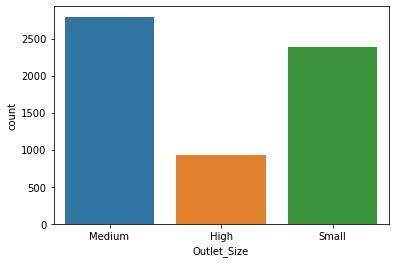

In [544]:
sns.countplot(traindf['Outlet_Size'])

In [545]:
traindf['Outlet_Size'].fillna('Missing',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

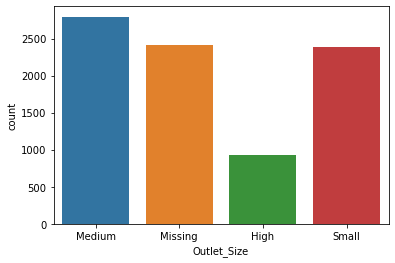

In [546]:
sns.countplot(traindf['Outlet_Size'])

In [547]:
mode_of_outlet_size = traindf.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))
miss_values = traindf['Outlet_Size'].isnull()
traindf.loc[miss_values, 'Outlet_Size'] = traindf.loc[miss_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [548]:
traindf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.372574,0.066132,140.992782,1997.831867,2181.288914
std,4.633510,0.051598,62.275067,8.371760,1706.499616
min,1.800000,0.000000,31.290000,1985.000000,33.290000
25%,8.365000,0.026989,93.826500,1987.000000,834.247400
50%,12.150000,0.053931,143.012800,1999.000000,1794.331000
75%,16.200000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [549]:
testdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [550]:
testdf.shape

(5681, 11)

In [551]:
testdf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [552]:
testdf.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [553]:
testdf['Item_Weight'].fillna(0,inplace=True)

In [554]:
ind=testdf[testdf['Item_Weight']==0].index

In [555]:
testdf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [556]:
for i in ind:
    it=testdf.iloc[i,0]
    testdf.iloc[i,1]=np.mean(testdf[testdf['Item_Identifier']==it]['Item_Weight'])

In [557]:
ind=testdf[testdf['Item_Weight']==0].index

In [558]:
testdf['Item_Weight'].replace(0,np.mean(testdf['Item_Weight']),inplace=True)

In [559]:
mode_of_outlet_size_test = testdf.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))
miss_values_test = testdf['Outlet_Size'].isnull()
testdf.loc[miss_values_test, 'Outlet_Size'] = testdf.loc[miss_values_test, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size_test[x])

In [560]:
testdf.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [561]:
traindf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [562]:
traindf['Item_Identifier'].value_counts(normalize=True)*100

FDG33    0.117330
FDW13    0.117330
FDX31    0.105597
FDU12    0.105597
FDG09    0.105597
           ...   
FDC23    0.011733
FDK57    0.011733
FDN52    0.011733
FDO33    0.011733
DRF48    0.011733
Name: Item_Identifier, Length: 1559, dtype: float64

In [563]:
traindf['Item_category']=traindf['Item_Identifier'].str[:2]

In [564]:
testdf['Item_category']=testdf['Item_Identifier'].str[:2]

In [565]:
traindf['new_item']=traindf['Item_Identifier'].str[-2:].astype('int')

In [566]:
testdf['new_item']=testdf['Item_Identifier'].str[-2:].astype('int')

In [567]:
traindf['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [568]:
traindf['Item_Fat_Content'].replace(['Low Fat','Regular','LF','reg','low fat'],['LF','REG','LF','REG','LF'],inplace=True)

In [569]:
traindf['Item_Fat_Content'].value_counts()

LF     5517
REG    3006
Name: Item_Fat_Content, dtype: int64

In [570]:
testdf['Item_Fat_Content'].replace(['Low Fat','Regular','LF','reg','low fat'],['LF','REG','LF','REG','LF'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

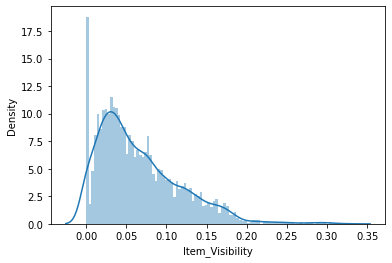

In [571]:
sns.distplot(traindf['Item_Visibility'],bins=100)

In [572]:
traindf[traindf['Item_Visibility']==0].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category,new_item
3,FDX07,19.200,REG,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,FD,7
4,NCD19,8.930,LF,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,19
5,FDP36,10.395,REG,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD,36
10,FDY07,11.800,LF,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,FD,7
32,FDP33,18.700,LF,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,FD,33


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

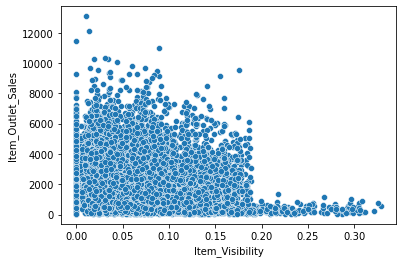

In [573]:
sns.scatterplot(traindf['Item_Visibility'],traindf['Item_Outlet_Sales'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Weight'>

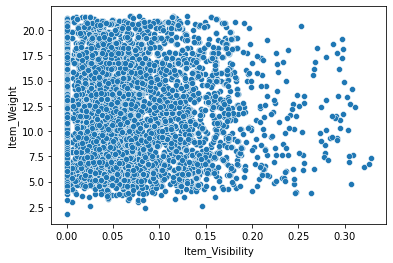

In [574]:
sns.scatterplot(traindf['Item_Visibility'],traindf['Item_Weight'])

In [575]:
ind=traindf[traindf['Item_Visibility']==0].index

In [576]:
for i in ind:
    it=traindf.iloc[i,1]
    traindf.iloc[i,3]=np.mean(traindf[traindf['Item_Weight']==it]['Item_Visibility'])

In [577]:
ind=testdf[testdf['Item_Visibility']==0].index

In [578]:
for i in ind:
    it=testdf.iloc[i,1]
    testdf.iloc[i,3]=np.mean(testdf[testdf['Item_Weight']==it]['Item_Visibility'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

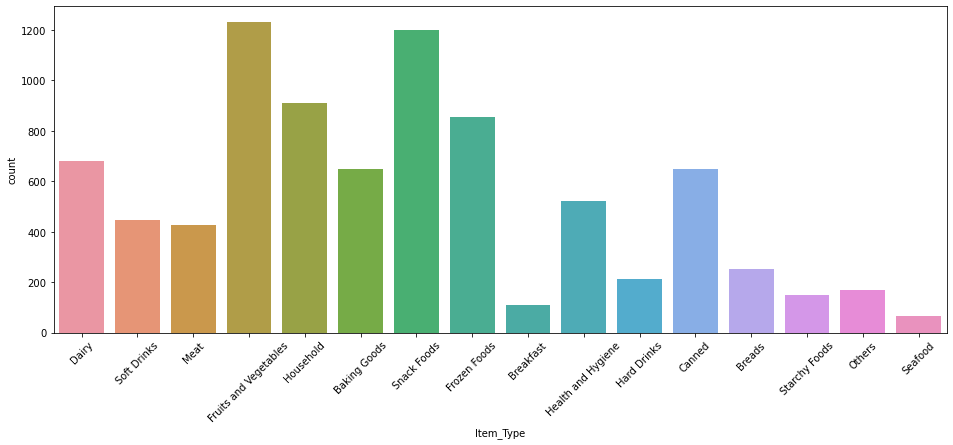

In [579]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(traindf['Item_Type'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

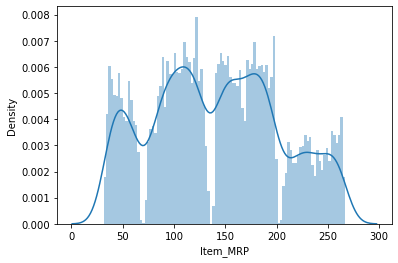

In [580]:
sns.distplot(traindf['Item_MRP'],bins=100)

In [581]:
def price_binning(s):
    if s<=67.5:
        return 0
    elif (s>67.5) & (s<=134.5):
        return 1
    elif (s>134.5) & (s<=201.1):
        return 2
    else:
        return 3

In [582]:
traindf['Price_bins']=traindf['Item_MRP'].apply(price_binning)
testdf['Price_bins']=testdf['Item_MRP'].apply(price_binning)

In [583]:
traindf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category,new_item,Price_bins
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,15,3
1,DRC01,5.92,REG,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,1,0
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,15,2
3,FDX07,19.20,REG,0.073084,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,FD,7,2
4,NCD19,8.93,LF,0.018274,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,19,0


In [584]:
traindf['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [585]:
traindf['new_out']=traindf['Outlet_Identifier'].str.split('0').str.get(1).astype('int')

In [586]:
testdf['new_out']=testdf['Outlet_Identifier'].str.split('0').str.get(1).astype('int')

In [587]:
traindf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category,new_item,Price_bins,new_out
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,15,3,49
1,DRC01,5.92,REG,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,1,0,18
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,15,2,49
3,FDX07,19.20,REG,0.073084,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,FD,7,2,1
4,NCD19,8.93,LF,0.018274,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,19,0,13


In [588]:
traindf['Outlet_Age']=2013-traindf['Outlet_Establishment_Year']
testdf['Outlet_Age']=2013-testdf['Outlet_Establishment_Year']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

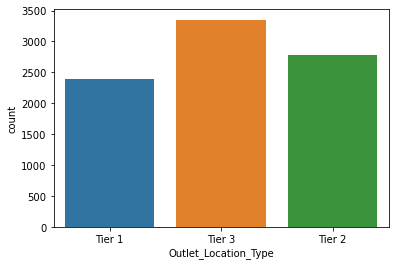

In [589]:
sns.countplot(traindf['Outlet_Location_Type'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

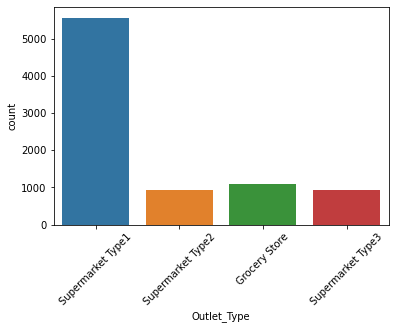

In [590]:
plt.xticks(rotation=45)
sns.countplot(traindf['Outlet_Type'])

In [591]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [592]:
for col in traindf.columns[traindf.dtypes=='object'].drop('Item_Identifier','Outlet_Identifier'):
    traindf[col]=le.fit_transform(traindf[col])

In [593]:
for col in testdf.columns[testdf.dtypes=='object'].drop('Item_Identifier','Outlet_Identifier'):
    testdf[col]=le.fit_transform(testdf[col])

In [594]:
traindf.groupby(['new_out'])['Item_Outlet_Sales'].mean().sort_values()

new_out
1      339.351662
19     340.329723
18    1995.498739
45    2192.384798
46    2277.844267
13    2298.995256
17    2340.675263
49    2348.354635
35    2438.841866
27    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [595]:
def outlet_bin(x):
    if x in [1,19]:
        return 1
    else:
        return 2
    

In [596]:
traindf['new_out']=traindf['new_out'].apply(outlet_bin)
testdf['new_out']=testdf['new_out'].apply(outlet_bin)

In [597]:
X_train, X_test, y_train, y_test = train_test_split(traindf.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Outlet_Establishment_Year'],axis=1), (traindf['Item_Outlet_Sales']), test_size=0.2, random_state=48)

In [598]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [599]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [600]:
model_1 = lgb.LGBMRegressor(max_depth=20,n_estimators=100)

model_1.fit(X_train, y_train,eval_set=[(X_test, y_test)],
    eval_metric='l2_root',
    early_stopping_rounds=100)

y_pred_model_1 = model_1.predict(X_test, num_iteration=model_1.best_iteration_)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred_model_1)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's rmse: 1681.35	valid_0's l2: 2.82695e+06
[2]	valid_0's rmse: 1592.37	valid_0's l2: 2.53565e+06
[3]	valid_0's rmse: 1516.67	valid_0's l2: 2.3003e+06
[4]	valid_0's rmse: 1452.35	valid_0's l2: 2.10933e+06
[5]	valid_0's rmse: 1399.18	valid_0's l2: 1.9577e+06
[6]	valid_0's rmse: 1353.43	valid_0's l2: 1.83178e+06
[7]	valid_0's rmse: 1314.92	valid_0's l2: 1.72901e+06
[8]	valid_0's rmse: 1282.83	valid_0's l2: 1.64566e+06
[9]	valid_0's rmse: 1257.16	valid_0's l2: 1.58044e+06
[10]	valid_0's rmse: 1233.07	valid_0's l2: 1.52046e+06
[11]	valid_0's rmse: 1213.24	valid_0's l2: 1.47196e+06
[12]	valid_0's rmse: 1197.61	valid_0's l2: 1.43427e+06
[13]	valid_0's rmse: 1184.66	valid_0's l2: 1.40341e+06
[14]	valid_0's rmse: 1174.26	valid_0's l2: 1.37888e+06
[15]	valid_0's rmse: 1165.46	valid_0's l2: 1.35831e+06
[16]	valid_0's rmse: 1158.83	valid_0's l2: 1.34288e+06
[17]	valid_0's rmse: 1152.6	valid_0's l2: 1.32848e+06
[18]	valid_0's rmse: 1147.49	valid_0's l2: 1.31674e+06
[19]	valid_0's rmse: 1

In [601]:
model_2 = GradientBoostingRegressor(n_estimators=700, min_samples_leaf=55)

model_2.fit(X_train, y_train)

y_pred_model_2 = model_2.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred_model_2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 790.2433755125613
MSE: 1314992.773423342
RMSE: 1146.7313431764835
R2 Score: 0.5866845365584845
------------------------------


In [602]:
model_3 = ExtraTreesRegressor(n_estimators=700,max_depth=6,min_samples_split=28, min_samples_leaf=50,n_jobs=-1)
model_3.fit(X_train, y_train)

y_pred_model_3 = model_3.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred_model_3)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 770.1769761079224
MSE: 1249885.7160552493
RMSE: 1117.9828782478064
R2 Score: 0.6071483399597397
------------------------------


In [603]:
final=VotingRegressor([('a',model_1),('c', model_3),('b',model_2)],weights=[1,1,1])

In [604]:
final.fit(traindf.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Outlet_Establishment_Year'],axis=1),(traindf['Item_Outlet_Sales']))

VotingRegressor(estimators=[('a', LGBMRegressor(max_depth=20)),
                            ('c',
                             ExtraTreesRegressor(max_depth=6,
                                                 min_samples_leaf=50,
                                                 min_samples_split=28,
                                                 n_estimators=700, n_jobs=-1)),
                            ('b',
                             GradientBoostingRegressor(min_samples_leaf=55,
                                                       n_estimators=700))],
                weights=[1, 1, 1])

In [605]:
preds=final.predict(testdf.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1))
preds=(abs(preds))

In [612]:
submission = pd.read_csv(r"D:\Python\Codes\Big Mart Sales Prediction Problem\Data\test_AbJTz2l.csv")

In [613]:
submission['Item_Outlet_Sales'] = preds

In [614]:
submission = submission[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [615]:
submission.to_csv("D:\Python\Codes\Big Mart Sales Prediction Problem\submission.csv", index=False)